# IMAGE CLASSIFIER

In [ ]:

!pip install tensorflow --quiet

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
import zipfile
import numpy as np


In [ ]:

!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip -O cats_and_dogs_filtered.zip

with zipfile.ZipFile("cats_and_dogs_filtered.zip", 'r') as zip_ref:
    zip_ref.extractall()


--2025-09-19 09:55:07--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 192.178.163.207, 173.194.202.207, 173.194.203.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|192.178.163.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   176MB/s    in 0.4s    

2025-09-19 09:55:07 (176 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
base_dir = 'cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=50
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - accuracy: 0.5337 - loss: 0.8711 - val_accuracy: 0.5100 - val_loss: 0.6843
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 190s 1s/step - accuracy: 0.5652 - loss: 0.6880 - val_accuracy: 0.5150 - val_loss: 0.6846
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.5549 - loss: 0.6766 - val_accuracy: 0.5050 - val_loss: 0.6925
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.5557 - loss: 0.6850 - val_accuracy: 0.5240 - val_loss: 0.6693
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.5420 - loss: 0.6718 - val_accuracy: 0.5800 - val_loss: 0.6525
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.6080 - loss: 0.6539 - val_accuracy: 0.6360 - val_loss: 0.6244
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.6466 - loss: 0.6336 - val_accuracy: 0.6580 - val_loss: 0.6075
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 132s 1s/step - accuracy: 0.6416 - loss: 0.6270 - val_accu

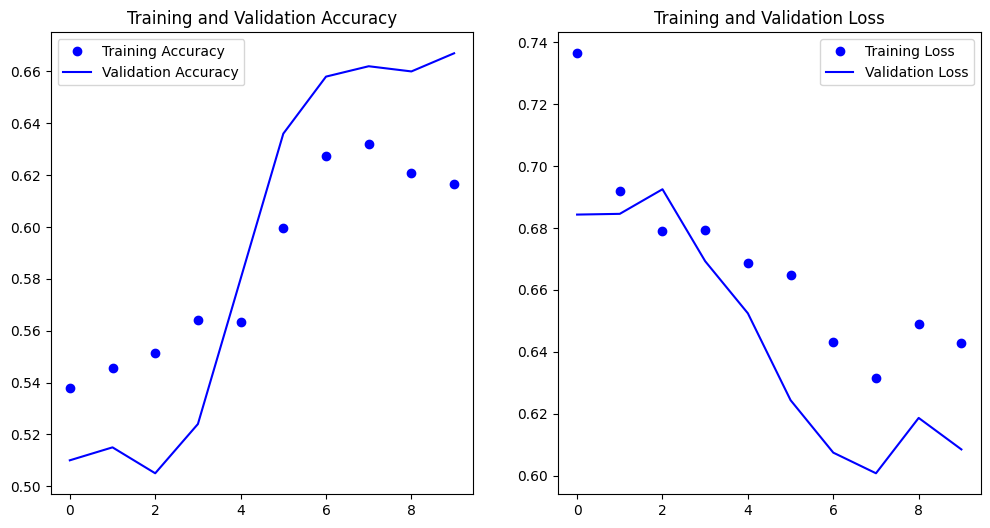

In [ ]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, 'bo', label='Training Accuracy')
plt.plot(epochs_range, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, 'bo', label='Training Loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def predict_image(image_path):
    img = load_img(image_path, target_size=(150, 150))
    img_tensor = img_to_array(img) / 255.0
    img_tensor = np.expand_dims(img_tensor, axis=0)

    prediction = model.predict(img_tensor)[0][0]
    print(f"Prediction confidence: {prediction:.4f}")

    if prediction > 0.5:
        print("Predicted: 🐶 Dog")
    else:
        print("Predicted: 🐱 Cat")

In [2]:
predict_image('/content/WIN_20250919_15_34_45_Pro.jpg')

NameError: name 'predict_image' is not defined